# Data Analysis Challenges

Here you will find 3 challenges for you to practice your skills in Python, NumPy and Matplotlib. Each challenge can be completed without completing the others. However, each challenge consists of sub-challenges and these are expected to be completed in sequence (e.g. Challenge 1.1 must be done beofre Challenge 1.2, but Challenge 3 can be completed without doing Challenge 1 or 2). Some subchallenges are marked as *Bonus*. These are more difficult challenge for you to dive deeper really sharpen your skills!

Before you start, be sure to:

1. Import NumPy package
2. Import Matplotlib package
3. Configure Matplotlib so plots will show up inside the notebook

In [2]:
# do your imports and configuration here:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


# Challenge 1: Loading and plotting data from a text file

Inside the data folder, you should find a file called `signals.dat`. Take a look at its content. The file has a few lines of **comment** that aids your understanding of the file content.

## Challenge 1.1

Using NumPy's `loadtxt` function, read in the content of the text file. Be sure to read through the `loadtxt`'s docstring to get a good understanding of how it works.

**Hints**
1. You can always get docstring with `?` at the end: i.e. `np.loadtxt?`
2. Pay special attention to what character is used in the file to separate individual data values
3. The file contains couple lines of comments that must be skipped when loading. Check if `loadtxt` allows you to ignore certain lines. Also, read the content of the comment carefully!

In [3]:
np.loadtxt?

Signature: np.loadtxt(fname, dtype=<class 'float'>, comments='#', delimiter=None, converters=None, skiprows=0, usecols=None, unpack=False, ndmin=0, encoding='bytes')
Docstring:
Load data from a text file.

Each row in the text file must have the same number of values.

Parameters
----------
fname : file, str, or pathlib.Path
    File, filename, or generator to read.  If the filename extension is
    ``.gz`` or ``.bz2``, the file is first decompressed. Note that
    generators should return byte strings for Python 3k.
dtype : data-type, optional
    Data-type of the resulting array; default: float.  If this is a
    structured data-type, the resulting array will be 1-dimensional, and
    each row will be interpreted as an element of the array.  In this
    case, the number of columns used must match the number of fields in
    the data-type.
comments : str or sequence of str, optional
    The characters or list of characters used to indicate the start of a
    comment. For backwards com

In [4]:
data = np.loadtxt('data/signals.dat', comments='//', delimiter=';')

## Challenge 1.2

Once loaded, you should get 4 signals with 100 data points. The fisrt signal is the value of time over which all other three signals are defined.

Plot the three signals on a same plot. Be sure to **label** each signal with an appropriate name (Hint: legend). Also be sure to label each axis, and give a title.

**Hint**: Be sure to read through the content of the data file to get a good understanding of the data, and reflect them in your plot.

Text(0.5,1,'Signals')

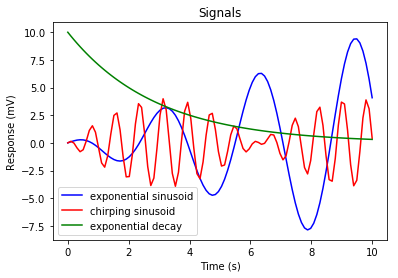

In [5]:
plt.plot(data[0],data[1],'b',label='exponential sinusoid')
plt.plot(data[0],data[2],'r',label='chirping sinusoid')
plt.plot(data[0],data[3],'g',label='exponential decay')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Response (mV)')
plt.title('Signals')

## Challenge 1.3

**Save your figure** into a file called `signals.png`. To find out what function in Matplotlib you will need to use, Google online. Be sure to use good keywords in your search. Also, be sure to save your figure at high enough resolution (i.e. at least 200 dpi). 

**Hint**: `matplotlib.pyplot` is equivalent to the `plt`. Remember that you do: `import matplotlib.pyplot as plt`?

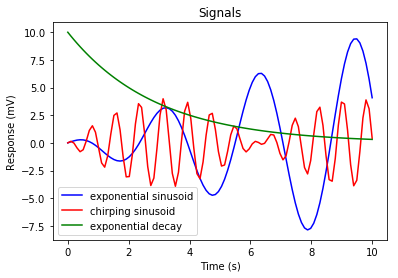

In [6]:
plt.plot(data[0],data[1],'b',label='exponential sinusoid')
plt.plot(data[0],data[2],'r',label='chirping sinusoid')
plt.plot(data[0],data[3],'g',label='exponential decay')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Response (mV)')
plt.title('Signals')
plt.savefig('signals.png',dpi=300)

## Challenge 1.4

For each signal, compute the means and standard deviations. Store your results in some variables for use in the next sub-challenge.

**Hint**: Make sure you use `axis` keyword arugment correctly.

In [8]:
avg = data[1:].mean(axis=1)
std = data[1:].std(axis=1)

0.04350024199999997

## Challenge 1.5

**Plot the means and standard deviations as bar plots with error bars**: height of the bar is the mean and error bar is the +/- 1 standard deviation.

Bar plots can be created with `plt.bar` - study it's documentation carefully to see how to use it and how to plot error bars.

Be sure to label both x-axis and y-axis.

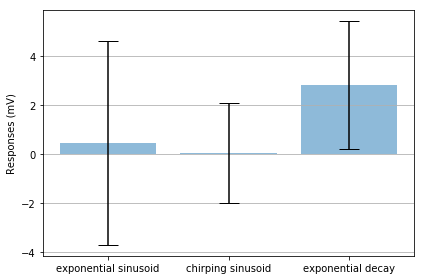

In [24]:
fig,ax = plt.subplots()
signals = ['exponential sinusoid','chirping sinusoid','exponential decay']
x_pos = np.arange(len(signals))
ax.bar(x_pos, avg, yerr=std, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Responses (mV)')
ax.set_xticks(x_pos)
ax.set_xticklabels(signals)
ax.yaxis.grid(True)
plt.tight_layout()

## Challenge 1.6

Repeat 1.4 and 1.5 but this time showing the mean and standard deivation bar plots for the **first half in time of the signals** as one plot and for the **second half in time of the signals** as another plot.

**Hint**:
1. Split your data into two halfs based on the time
2. Plot two sets of bar plots into separate `subplot`s.
3. Make sure you put appropriate titles.

In [47]:
first = data[:,:int(0.5*len(data[0]))]
second = data[:,-int(0.5*len(data[0])):]
first_mean = first[1:].mean(axis=1)
first_std = first[1:].std(axis=1)
second_mean = second[1:].mean(axis=1)
second_std = second[1:].std(axis=1)

# Challenge 2: Working with labeled images

In the `data` folder you will find two files: `mnist_images.npy` and `mnist_labels.npy`. These two files contain a set of images and corresponding labels for **handwritten digits** found in a dataset called [MNIST](http://yann.lecun.com/exdb/mnist/).

## Challenge 2.1

Load the content of the `mnist_images.npy` and `mnist_labels.npy` into separate variables. `mnist_images.npy` contains a NumPy array representing a set of 100 **images** of hand written digits, where each image is 28 x 28 pixels in shape. `mnist_labels.npy` contains an array that holds the **labels** for all images - the digit that is written in the image.

## Challenge 2.2

Plot the first 16 MNIST images in 4 x 4 subplots. Be sure to use a suitable color map, and remove axis.

**Hints** (you need not use the following to achieve the results but these are my recommendations):
1. Use the object based way of creating Matplotlib figures - that is use `fig` and `ax` instead of just `plt`
2. Use `fig, axs = plt.subplots(...)` to create a figure and appropriately arranged axes
3. Use `ravel()` to flatten out an array when you want to visit the elements sequentially
4. Use `zip` to pair up flattened list of `axs` and `images` to visit them in a pair

## Challenge 2.3

Using the labels data, count the number of images for each digit. Plot this as bar plots, where each bar represents the number of images for a digit. Look up `plt.bar` docstring (i.e. run `plt.bar?`) to learn how to create bar plots.

## Challenge 2.4 (Bonus)

Show 3 example images from each of the 10 digits, and plot them. Ideally, you will plot them as 10 x 3 subplots (that is, 10 rows and 3 columns - each row is a digit and each column is an example).

You may find the following pattern of plot axes iteration helpful:

```python
fig, axs = plt.subplots(5, 3)  # 5 rows, 3 columns

for row, axs_row in enumerate(axs): # visiting each row
    # here `row` is the row index
    for col, ax in enumerate(axs_row): # now visit each column in a row
        # here `col` is the column index
        # ax is a single axes object at the row index `row` and column index `col`
        
        #...work with ax...
```

**Hints**:
Think about how to get a NumPy array containing only images for a specific digit. Consider using boolean indexing. You can actually use fancy boolean index for each axis separately. That is:

In [ ]:
data = np.array([[1, 2, 3, 4], [10, 20, 30, 40], [100, 200, 300, 400], [1000, 2000, 3000, 4000]])
magnitude = np.array([1, 2, 0, 1])

choice = magnitude == 1

# fancy boolean indexing on axis=0 (rows) - can be thought of as selecting rows based on boolean indexing
print('data[choice]=')
print(data[choice])

# same as above
print('\ndata[choice, :]=')
print(data[choice, :])

# fancy boolean indexing on axis=1 (columns) - selecting columns based on boolean indexing
print('\ndata[:, choice]=')
print(data[:, choice])

In [ ]:
# Your answer goes here


# Challenge 3: Manipulating images with transparency

**Directions**: Step through the following cells to learn about how alpha channel works in images. After that, attempt the challenges.

In the class you learned that a 3D array with 3 channels correpond to RGB colored images. It turns out that you can have yet another channel called **alpha** channel to specify the **transparency** of each pixel. Consider the following:

In [ ]:
from scipy import misc

In [ ]:
face = misc.face() # get face of racoon
# make it into float image with values between 0 and 1
face = face / 255.0

In [ ]:
plt.imshow(face)
plt.axis('off')

Let's now load an image of checker board pattern:

In [ ]:
import imageio
chk = imageio.imread('data/checkerboard.jpg')

In [ ]:
plt.imshow(chk)
plt.axis('off')

By default, plotting two images in a same figure causes the latter image to completely hide the earlier:

In [ ]:
plt.imshow(chk)
plt.imshow(face)
plt.axis('off')

However, you can control the **transparency** by adding the alpha achannel.

In [ ]:
h, w, c = face.shape
alpha = np.ones((h, w, 1)) # create an image same shaped as face filled with ones as a
face = np.concatenate([face, alpha], axis=2) # concatenate the alpha channel along the axis=2 (channel dimension)

Now face has shape 4 in the channel dimension, and this channel is filled with 1s.

In [ ]:
face.shape

At this point, the image is completely **opaque** and not transparent:

In [ ]:
plt.imshow(chk)
plt.imshow(face)
plt.axis('off')

But you can control the transparency by changing values in the alpha channel:

In [ ]:
face[:, :, 3] = 0.8 # set alpha to 0.8 for all pixels

In [ ]:
plt.imshow(chk)
plt.imshow(face)
plt.axis('off')

Now the image of racoon (`face`) has **opacity** of 80%. In other words, it is 20% transparent.

You can set the transparency differntly for each pixel:

In [ ]:
h, w, c = face.shape
face[:, :, 3] = 1.0 # reset to opaque image
face[:, w//2:, 3] = 0.9 # make right half 90% opacity

In [ ]:
plt.imshow(chk)
plt.imshow(face)
plt.axis('off')

Now that you have seen how opacity works, manipulate the alpha channel to achieve the following results:

## Challenge 3.1

100 pixel border that is at 60% opacity with opaque (non-transparent) center content:

![challenge3.1](data/results3-1.png)

In [ ]:
face[:, :, 3] = 1.0 # reset to opaque image

# your code goes here

In [ ]:
plt.imshow(chk)
plt.imshow(face)
plt.axis('off')

## Challenge 3.2

Pixel's opacity is 1.0 only where the value of the average RGB channel intensity is > 0.1.

![challenge3.2](data/results3-2.png)

In [ ]:
face[:, :, 3] = 1.0 # reset to opaque image

# your code goes here

In [ ]:
plt.imshow(chk)
plt.imshow(face)
plt.axis('off')

## Challenge 3.3

The opacity outside of circle of radius of 300 pixels is 0.6, and 1 inside of the circle.

![challenge3.3](data/results3-3.png)

In [ ]:
face[:, :, 3] = 1.0 # reset to opaque image

# get a grid of y and x values
h, w, c = face.shape
xv = np.arange(w)[np.newaxis, :]
yv = np.arange(h)[:, np.newaxis]
cy, cx = h // 2, w // 2

# Your code goes here:

# Hint: do something to compute the distance from the center of the image at cy, cx
# and then use that to manipulate opacity



In [ ]:
plt.imshow(chk)
plt.imshow(face)
plt.axis('off')

## Challenge 3.4 (Bonus)

The opacity falls off with the distance from the center of the image following the following equation:

$$
o = 2^{-\frac{d^2}{360000}}
$$

where $o$ is the opacity and $d$ is the distance from the center.

![challenge3.4](data/results3-4.png)

In [ ]:
face[:, :, 3] = 1.0 # reset to opaque image

# get a grid of y and x values
h, w, c = face.shape
xv = np.arange(w)[np.newaxis, :]
yv = np.arange(h)[:, np.newaxis]
cy, cx = h // 2, w // 2

# Your code goes here:

# Hint: do something to compute the distance from the center of the image at cy, cx
# and then use this to compute the opacity


In [ ]:
plt.imshow(chk)
plt.imshow(face)
plt.axis('off')